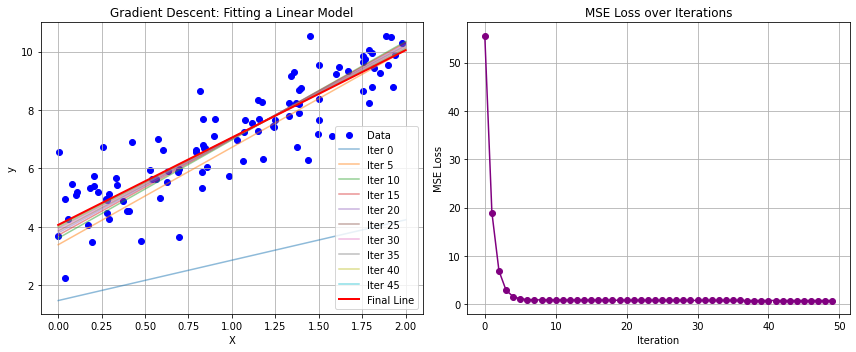

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(1)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize theta
theta = np.random.randn(2, 1)
learning_rate = 0.1
iterations = 50

# For tracking
theta_history = []
loss_history = []

# MSE loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent loop
for i in range(iterations):
    y_pred = X_b @ theta
    loss = mse_loss(y, y_pred)
    gradients = 2/len(X_b) * X_b.T @ (y_pred - y)
    theta = theta - learning_rate * gradients

    theta_history.append(theta.copy())
    loss_history.append(loss)

# Plot progress of the line fitting
plt.figure(figsize=(12, 5))

# Left plot: line fitting
plt.subplot(1, 2, 1)
plt.scatter(X, y, color="blue", label="Data")
line_x = np.array([[0], [2]])

for i in range(0, iterations, 5):
    line_y = theta_history[i][0] + theta_history[i][1] * line_x
    plt.plot(line_x, line_y, label=f"Iter {i}", alpha=0.5)

final_y = theta[0] + theta[1] * line_x
plt.plot(line_x, final_y, color="red", linewidth=2, label="Final Line")

plt.title("Gradient Descent: Fitting a Linear Model")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Right plot: MSE loss
plt.subplot(1, 2, 2)
plt.plot(range(iterations), loss_history, marker='o', color="purple")
plt.title("MSE Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.grid(True)

plt.tight_layout()
plt.show()
